In [4]:
#Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)


In [2]:
#loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# EDA 

In [7]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Observation : Here we can see we have multiple object columns 
    
    1. we can see the some columns are having distinct values company name and having unique 'gppd_idnr' column so the column can be drop also we can see "url" column is also having unique value as per Company hence we will drop this as well
    
    2.Country and Country_long col is having only one unique value which is not participating much to predict data hence we can drop those col as well
    
    3.'other_fuel2' and 'other_fuel3' are columns almost having Null value hence it will not contribute much to predict output hence we will check distinct value and will drop column if needed.
    
    4.generation_gwh_2013,wepp_id,generation_gwh_2019,estimated_generation_gwh is having only NaN value hence we can drop ths columns as well.
    


In [25]:
#checking shape of the dataset
df.shape

(907, 27)

In [26]:
#checking unique values
df.nunique().sort_values(ascending=False)

name                        907
gppd_idnr                   907
latitude                    836
longitude                   827
generation_gwh_2018         410
generation_gwh_2017         408
generation_gwh_2016         403
generation_gwh_2015         396
generation_gwh_2014         371
capacity_mw                 361
url                         304
owner                       280
source                      191
commissioning_year           73
primary_fuel                  8
other_fuel1                   3
geolocation_source            3
generation_data_source        1
country                       1
year_of_capacity_data         1
country_long                  1
other_fuel2                   1
generation_gwh_2013           0
wepp_id                       0
other_fuel3                   0
generation_gwh_2019           0
estimated_generation_gwh      0
dtype: int64

In [23]:
print('country:',df.country.unique())
print('generation_gwh_2013:',df.generation_gwh_2013.unique())
print('wepp_id:',df.wepp_id.unique())
print('other_fuel3:',df.other_fuel3.unique())
print('generation_gwh_2019:',df.generation_gwh_2019.unique())
print('estimated_generation_gwh:',df.estimated_generation_gwh.unique())

country: ['IND']
generation_gwh_2013: [nan]
wepp_id: [nan]
other_fuel3: [nan]
generation_gwh_2019: [nan]
estimated_generation_gwh: [nan]


IND    907
Name: country, dtype: int64


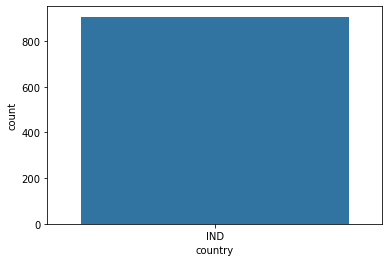

In [16]:
import seaborn as sns
ax=sns.countplot(x="country",data=df)
print(df["country"].value_counts())

Only One value present so we will drop this column

Central Electricity Authority    449
Name: generation_data_source, dtype: int64


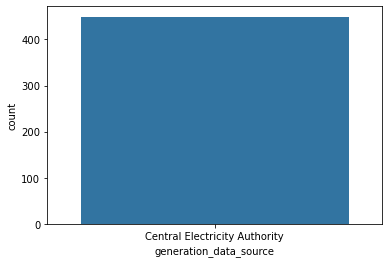

In [17]:
import seaborn as sns
ax=sns.countplot(x="generation_data_source",data=df)
print(df["generation_data_source"].value_counts())

Observation: "generation_data_source" having one Data with Count 449 rest Data is NaN hence we will not Drop this column

Oil    1
Name: other_fuel2, dtype: int64


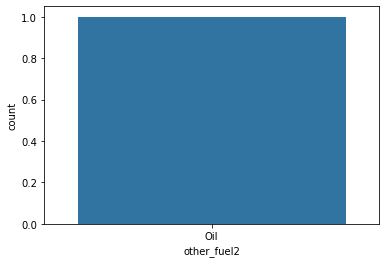

In [20]:
import seaborn as sns
ax=sns.countplot(x="other_fuel2",data=df)
print(df["other_fuel2"].value_counts())

Observation: "other_fuel2" having one Data with Count 1 rest Data is NaN hence we will  Drop this column

2019.0    519
Name: year_of_capacity_data, dtype: int64


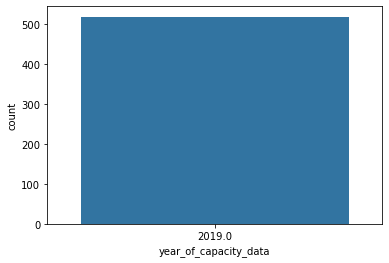

In [18]:
import seaborn as sns
ax=sns.countplot(x="year_of_capacity_data",data=df)
print(df["year_of_capacity_data"].value_counts())

Observation: "year_of_capacity_data" having one Data with Count 519 rest Data is NaN hence we will not Drop this column

# Removing Column which are not required

In [29]:
df.drop(columns=['country','country_long','name','gppd_idnr','other_fuel2','other_fuel3','source','url','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh',
],inplace=True)

In [43]:
#checking dtype of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   other_fuel1             198 non-null    object 
 5   commissioning_year      527 non-null    float64
 6   owner                   342 non-null    object 
 7   geolocation_source      888 non-null    object 
 8   generation_gwh_2014     398 non-null    float64
 9   generation_gwh_2015     422 non-null    float64
 10  generation_gwh_2016     434 non-null    float64
 11  generation_gwh_2017     440 non-null    float64
 12  generation_gwh_2018     448 non-null    float64
 13  generation_data_source  449 non-null    object 
dtypes: float64(9), object(5)
memory usage: 99.

# checking null values 

In [39]:
df.isnull()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,False,False,False,False,True,False,False,False,True,True,True,True,True,True
1,False,False,False,False,True,True,False,False,True,True,True,True,True,True
2,False,False,False,False,True,True,False,False,True,True,True,True,True,True
3,False,False,False,False,True,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,False,False,False,False,False,False,True,False,True,False,False,False,False,False
903,False,False,False,False,True,True,False,False,True,True,True,True,True,True
904,False,False,False,False,True,True,True,False,True,True,True,True,True,True
905,False,False,False,False,True,True,False,False,True,True,True,True,True,True


In [42]:
df.isnull().sum().sort_values(ascending=False)

other_fuel1               709
owner                     565
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
commissioning_year        380
latitude                   46
longitude                  46
geolocation_source         19
capacity_mw                 0
primary_fuel                0
dtype: int64

Here we can see now some of the columns present Null values. Will check using Heatmap Graph

<AxesSubplot:>

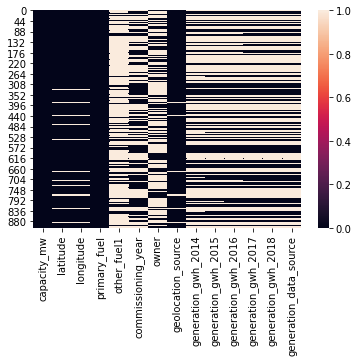

In [44]:
sns.heatmap(df.isnull())

In [45]:
df.groupby(['primary_fuel']).size()

primary_fuel
Biomass     50
Coal       258
Gas         69
Hydro      251
Nuclear      9
Oil         20
Solar      127
Wind       123
dtype: int64

In [46]:
df.groupby(['capacity_mw']).size()

capacity_mw
0.0        1
1.0       18
1.5        3
1.7        2
1.8        1
          ..
3300.0     1
3960.0     1
4000.0     1
4620.0     1
4760.0     1
Length: 361, dtype: int64

In [53]:
df1=df
df1.head() #to avoid confusion

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,3,2011.0,229,1,NaN,NaN,NaN,NaN,NaN,1
1,98.0,24.7663,74.6090,1,3,NaN,258,2,NaN,NaN,NaN,NaN,NaN,1
2,39.2,21.9038,69.3732,7,3,NaN,2,2,NaN,NaN,NaN,NaN,NaN,1
3,135.0,23.8712,91.3602,2,3,2004.0,280,2,617.789264,843.747,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,2015.0,280,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,0


# Using label Encoder technique To convert Object COlumns in Numeric

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
#by using for loop here we encoded the object columns
for col in df1:
    if df1[col].dtype==np.number:
        continue
    df1[col]=LabelEncoder().fit_transform(df1[col])

In [51]:
df1

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,3,2011.0,229,1,NaN,NaN,NaN,NaN,NaN,1
1,98.0,24.7663,74.6090,1,3,NaN,258,2,NaN,NaN,NaN,NaN,NaN,1
2,39.2,21.9038,69.3732,7,3,NaN,2,2,NaN,NaN,NaN,NaN,NaN,1
3,135.0,23.8712,91.3602,2,3,2004.0,280,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,2015.0,280,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.0,280,2,NaN,0.994875,233.596650,865.400000,686.500000,0
903,3.0,12.8932,78.1654,6,3,NaN,114,0,NaN,NaN,NaN,NaN,NaN,1
904,25.5,15.2758,75.5811,7,3,NaN,280,2,NaN,NaN,NaN,NaN,NaN,1
905,80.0,24.3500,73.7477,1,3,NaN,91,2,NaN,NaN,NaN,NaN,NaN,1


now all object columns is encoded

In [52]:
#checking the overall health of the dataset
df1.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.000000,861.000000,861.000000,907.000000,907.000000,527.000000,907.000000,907.000000,398.000000,422.000000,434.000000,440.000000,448.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,2.777288,1997.091082,227.476295,1.754135,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.504961
std,590.085456,6.239612,4.939316,2.280652,0.429348,17.082868,83.924045,0.700183,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,0.500251
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1.000000,3.000000,1988.000000,188.500000,2.000000,223.557672,176.381063,188.285252,177.874930,193.378250,0.000000
50%,59.200000,21.780000,76.719500,3.000000,3.000000,2001.000000,280.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375,1.000000
75%,385.250000,25.512400,79.440800,6.000000,3.000000,2012.000000,280.000000,2.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,1.000000
max,4760.000000,34.649000,95.408000,7.000000,3.000000,2018.000000,280.000000,3.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000


Observation:
    
    1. After removing unwanted column we have encoded data for object column in Numeric
    2. Now we can see we have Data with nan values
    3. we have skwness pesent in Data as comparing Mean > 50th Percentile
    4. we have Putlier present in Data as comparing 75th Percentile and Max

We will validate this assumption and based on we will take Action to handle Null Value, Outliers and Skwness

# Checking and Handling Null Data

In [54]:
df1.isnull().sum().sort_values(ascending=False)

generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
commissioning_year        380
latitude                   46
longitude                  46
capacity_mw                 0
primary_fuel                0
other_fuel1                 0
owner                       0
geolocation_source          0
generation_data_source      0
dtype: int64

Here we can see the Null Data count with all columns hence model will not predict well so we will replace all Null values with Mean values so we should not have Null values in the data

In [57]:
#filling the missing values ny fillna method
df1['latitude']=df1['latitude'].fillna(df1['latitude'].mean())
df1['longitude']=df1['longitude'].fillna(df1['longitude'].mean())
df1['commissioning_year']=df1['commissioning_year'].fillna(df1['commissioning_year'].mean())
df1['generation_gwh_2014']=df1['generation_gwh_2014'].fillna(df1['generation_gwh_2014'].mean())
df1['generation_gwh_2015']=df1['generation_gwh_2015'].fillna(df1['generation_gwh_2015'].mean())
df1['generation_gwh_2016']=df1['generation_gwh_2016'].fillna(df1['generation_gwh_2016'].mean())
df1['generation_gwh_2017']=df1['generation_gwh_2017'].fillna(df1['generation_gwh_2017'].mean())
df1['generation_gwh_2018']=df1['generation_gwh_2018'].fillna(df1['generation_gwh_2018'].mean())


In [58]:
df1.isnull().sum().sort_values(ascending=False)

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Now we dont have any Null Data present in Dataset

In [59]:
#now checking the nans is filled or not!!!!!!!!
df1.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,2.777288,1997.091082,227.476295,1.754135,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.504961
std,590.085456,6.079148,4.812291,2.280652,0.429348,13.016360,83.924045,0.700183,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,0.500251
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,3.000000,1997.091082,188.500000,2.000000,1211.362750,916.000000,896.500214,882.594850,824.842340,0.000000
50%,59.200000,21.281800,76.979200,3.000000,3.000000,1997.091082,280.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
75%,385.250000,25.176450,79.206100,6.000000,3.000000,2003.000000,280.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
max,4760.000000,34.649000,95.408000,7.000000,3.000000,2018.000000,280.000000,3.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000


<AxesSubplot:>

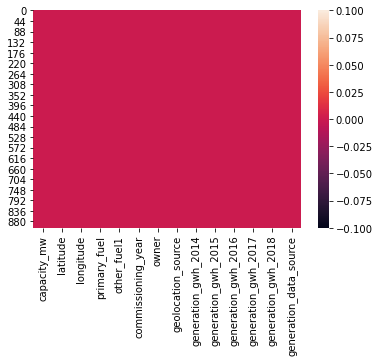

In [60]:
#checking null value by heatmap
sns.heatmap(df1.isnull())

hence we clear that no null values present in the dataset

# checking the correlation

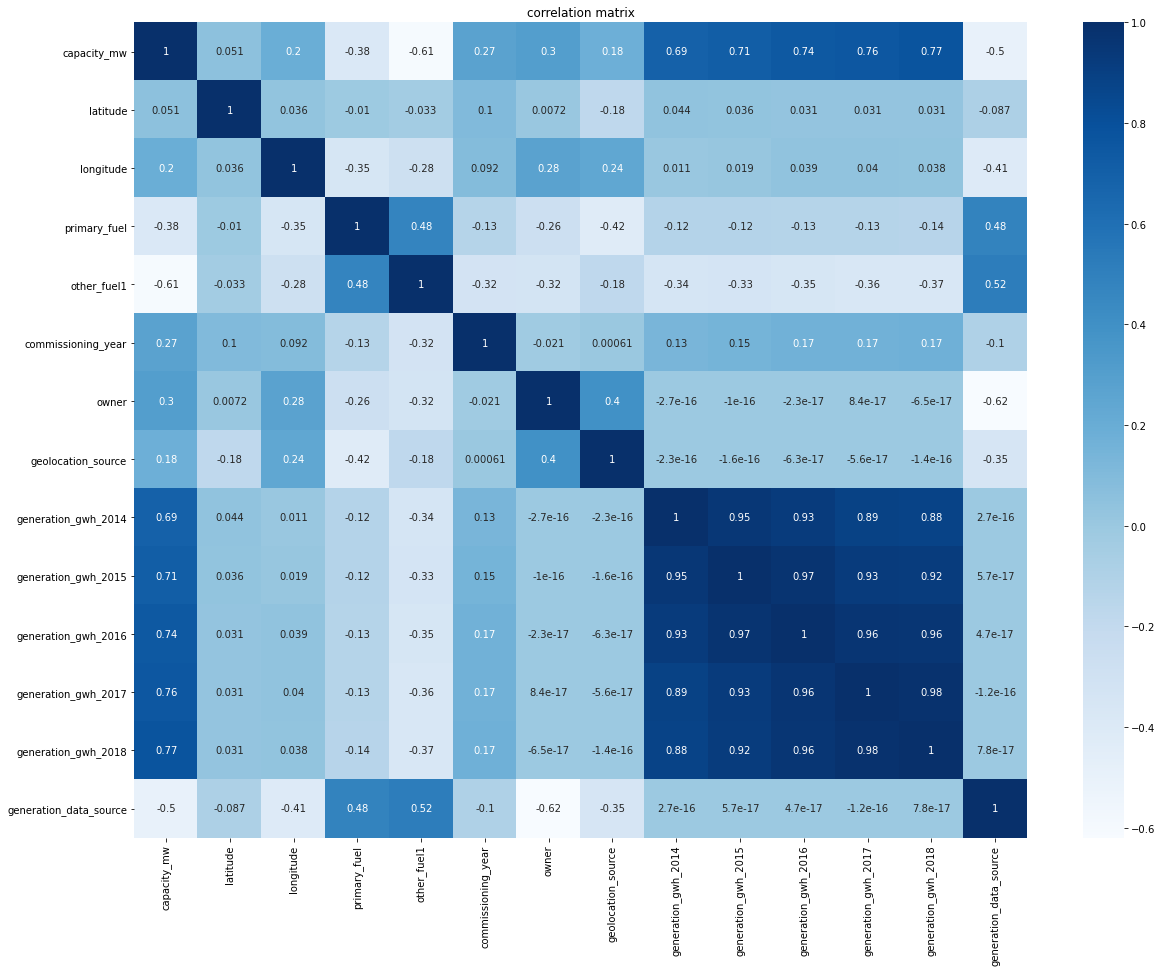

In [61]:
corr_mat=df1.corr()
plt.figure(figsize=[20,15])
sns.heatmap(corr_mat,annot=True,cmap='Blues')
plt.title('correlation matrix')
plt.show()

Observation:
    
    1.Primary fuel Output column are highly correlated with other fuel 1 and generation Data source column
    2.Capacity MW output column is highly corelated with all Generation gw columns
    3.Here we can see there are multiple columns for "generation GWH" are highly corelated with each other hence we need to compare this column with VIF technique to removive multicolinearity. as multicolinearity can imapct the accuracy as all columns are having almost similar data.

# Corlelation with Output columns

In [62]:
corr_mat['capacity_mw'].sort_values(ascending=False)

capacity_mw               1.000000
generation_gwh_2018       0.773456
generation_gwh_2017       0.757585
generation_gwh_2016       0.742221
generation_gwh_2015       0.711190
generation_gwh_2014       0.694350
owner                     0.304322
commissioning_year        0.274292
longitude                 0.195882
geolocation_source        0.183419
latitude                  0.050984
primary_fuel             -0.380395
generation_data_source   -0.495833
other_fuel1              -0.606289
Name: capacity_mw, dtype: float64

In [63]:
corr_mat['primary_fuel'].sort_values(ascending=False)

primary_fuel              1.000000
generation_data_source    0.482339
other_fuel1               0.476410
latitude                 -0.010204
generation_gwh_2014      -0.124769
generation_gwh_2015      -0.124828
commissioning_year       -0.126650
generation_gwh_2016      -0.131051
generation_gwh_2017      -0.132003
generation_gwh_2018      -0.136983
owner                    -0.260389
longitude                -0.347948
capacity_mw              -0.380395
geolocation_source       -0.420263
Name: primary_fuel, dtype: float64

Here we can see positive and negative related columns with output Dcolumns.
On negative side we dont have such column near to -1 hence we are not going to drop any column based on negative corelation compatision

# checking data distribution by dist plot for Skewness

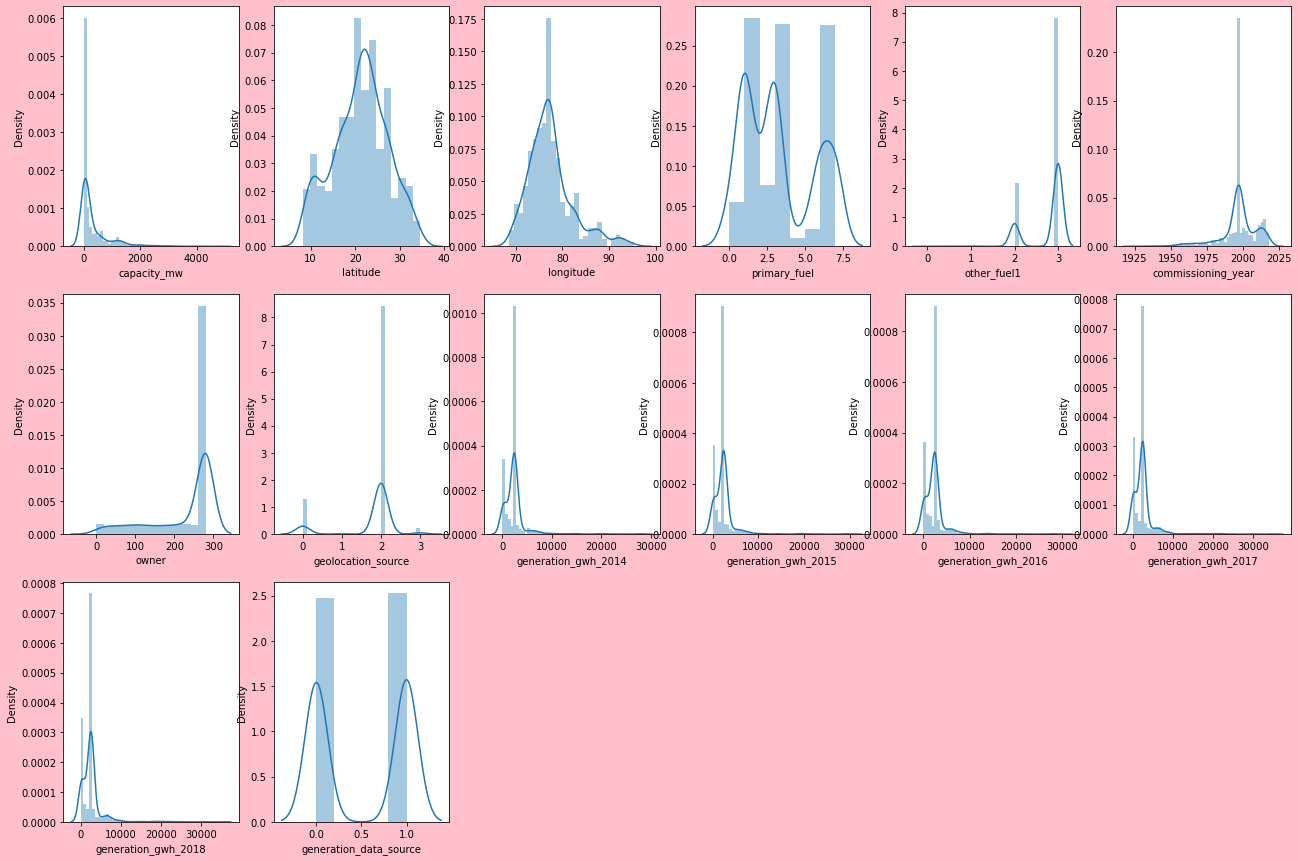

In [65]:
#checking one more time
plt.figure(figsize=(22,15),facecolor='pink')
plotnumber=1

for column in df1:
    if plotnumber<=18:
        ax=plt.subplot(3,6,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

Skewness Are present as we can not see the Normalised grapgh

# checking and handling outliers

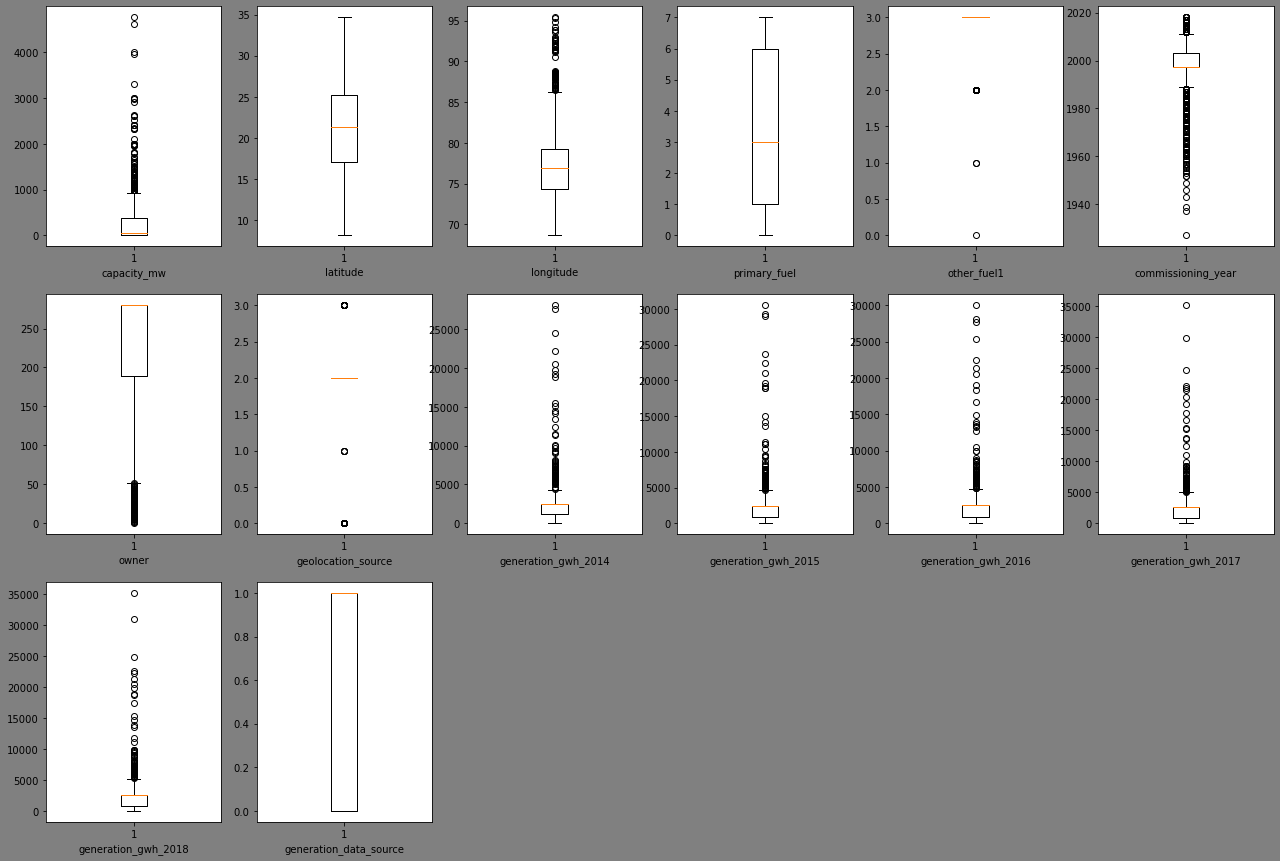

In [66]:
plt.figure(figsize=(22,15),facecolor='gray')
plotnumber=1

for column in df1:
    if plotnumber<=18:
        ax=plt.subplot(3,6,plotnumber)
        plt.boxplot(df1[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

here we can see lots of outliers is present in the almost all the columns so we can remove that by zscore method

# Using Zsore outlier Removing technique

In [67]:
from scipy.stats import zscore 

In [68]:
z=np.abs(zscore(df1))
z

array([[5.48907549e-01, 1.14980517e+00, 8.78279731e-01, ...,
        1.55741196e-16, 1.50124402e-16, 9.90125924e-01],
       [3.86977292e-01, 5.87310989e-01, 5.93788441e-01, ...,
        1.55741196e-16, 1.50124402e-16, 9.90125924e-01],
       [4.86678853e-01, 1.16179322e-01, 1.68239437e+00, ...,
        1.55741196e-16, 1.50124402e-16, 9.90125924e-01],
       ...,
       [5.09908639e-01, 9.74706510e-01, 3.91673420e-01, ...,
        1.55741196e-16, 1.50124402e-16, 9.90125924e-01],
       [4.17498178e-01, 5.18793221e-01, 7.72866383e-01, ...,
        1.55741196e-16, 1.50124402e-16, 9.90125924e-01],
       [5.25169082e-01, 1.85383409e+00, 2.47270171e-03, ...,
        1.55741196e-16, 1.50124402e-16, 9.90125924e-01]])

In [69]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 222, 244, 308, 308, 308,
       308, 308, 308, 323, 333, 340, 342, 360, 363, 364, 364, 364, 364,
       364, 364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493,
       493, 493, 493, 493, 494, 494, 494, 494, 494, 494, 499, 519, 538,
       541, 546, 573, 577, 583, 592, 601, 621, 638, 648, 648, 648, 648,
       648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695,
       695, 706, 709, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
       726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786, 786,
       788, 807, 808, 808, 808, 808, 808, 808, 811, 813, 817, 818, 847,
       848, 880, 880, 880, 880, 880, 880], dtype=int64), array([ 0,  9, 10, 11, 12,  0,  8,  9, 10, 11, 12,  0,  8,  2,  2,  0,  8,
        9, 10, 11, 12,  5,  2,  0,  8,  9, 10, 11, 12,  2,  2,  2,  5,  2,
        0,  0,  8,  9, 10, 11, 12,  5,  0,  2,  2,  5,  5,  5,  0,  5,  

In [70]:
df1_new=df1[(z<3).all(axis=1)]

In [71]:
df1_new

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,3,2011.000000,229,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,98.0,24.7663,74.6090,1,3,1997.091082,258,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,39.2,21.9038,69.3732,7,3,1997.091082,2,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,135.0,23.8712,91.3602,2,3,2004.000000,280,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,2015.000000,280,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.000000,280,2,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,3.0,12.8932,78.1654,6,3,1997.091082,114,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
904,25.5,15.2758,75.5811,7,3,1997.091082,280,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
905,80.0,24.3500,73.7477,1,3,1997.091082,91,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1


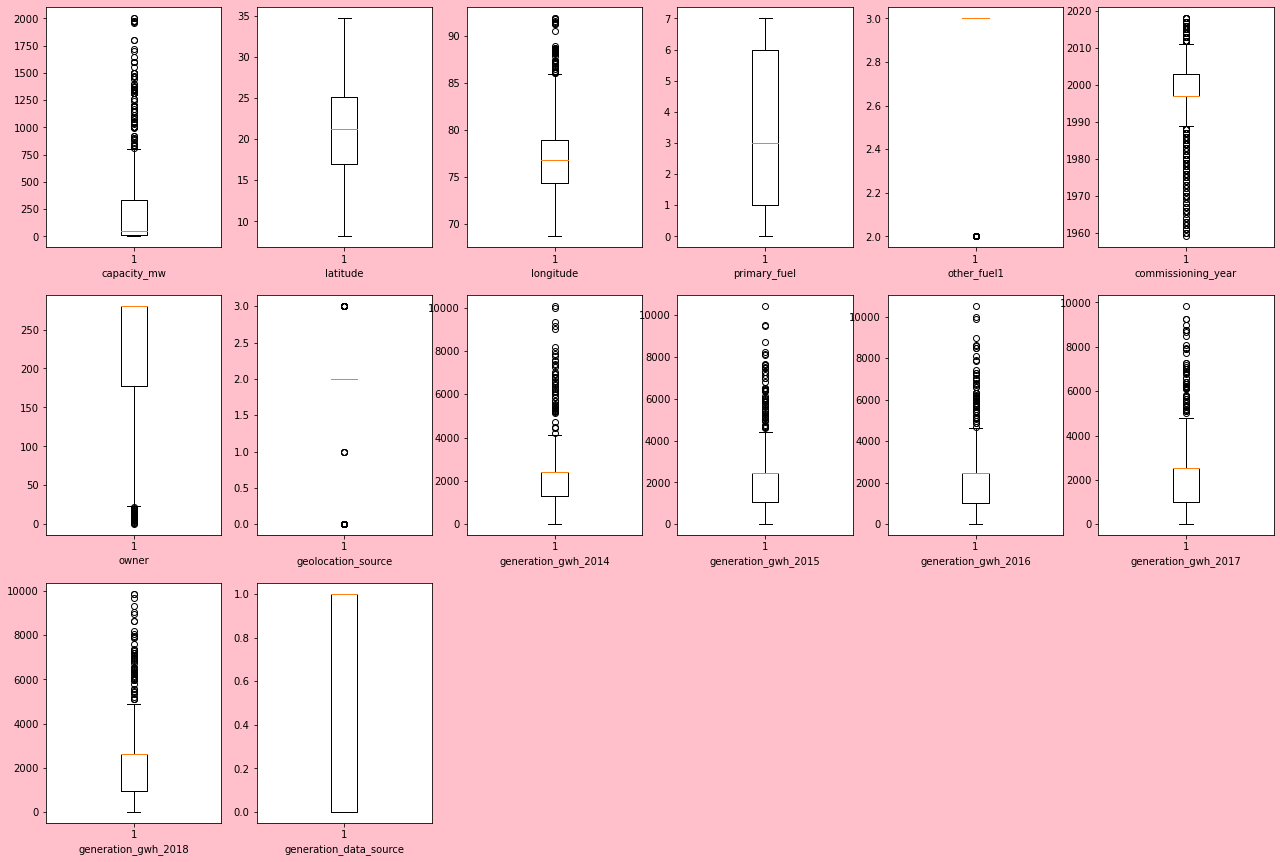

In [73]:
#checking wether outliers is removed or not!!!!! by box plot
plt.figure(figsize=(22,15),facecolor='pink')
plotnumber=1

for column in df1_new:
    if plotnumber<=18:
        ax=plt.subplot(3,6,plotnumber)
        plt.boxplot(df1_new[column])
        plt.xlabel(column)
        
    plotnumber+=1
;plt.show()

Here we can see the outlier are still present but now we cant remove outlier as it is not best practise to apply z score method twice on data due to data loss which is suggested by shankar sir.

In [74]:
df1_new.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,268.556727,21.116391,77.060117,3.274232,2.797872,1997.936785,223.833333,1.738771,2185.449191,2152.586283,2190.919311,2257.941826,2290.858532,0.528369
std,424.327486,6.117216,4.305353,2.325668,0.401824,11.101507,85.655160,0.719359,1490.489046,1530.582335,1588.211519,1630.263952,1676.727656,0.499490
min,0.000000,8.168900,68.644700,0.000000,2.000000,1959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.125000,16.926400,74.275300,1.000000,3.000000,1997.091082,177.000000,2.000000,1288.251375,1058.189525,1000.404000,1014.721113,944.183763,0.000000
50%,50.400000,21.208800,76.748800,3.000000,3.000000,1997.091082,280.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
75%,330.000000,25.136350,78.930850,6.000000,3.000000,2003.000000,280.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
max,2000.000000,34.649000,91.823900,7.000000,3.000000,2018.000000,280.000000,3.000000,10063.180000,10422.690000,10503.882000,9833.690000,9859.500000,1.000000


Observation: Std dev is high in multiple columns hence possibilies are present for skwness in Data.
    Need to remove skwness from all columns with using Power transform technique.
    It also convert the data in same format hence we can further avoid standard scaler

# Creating feature and labels

In [76]:
X=df1_new.drop(columns=['primary_fuel','capacity_mw'])

y=df1_new.capacity_mw          

y1=df1_new.primary_fuel           

In [78]:
y # Capacity MW is having increment Data hence we will use Regression Model for prediction

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 846, dtype: float64

In [79]:
y1 # primary_fuel is having categorical Data hence we will use classifier Model for prediction

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 846, dtype: int32

# checking skewness with skew method

In [81]:
X.skew().sort_values(ascending=False) # having high skewness 

generation_gwh_2014       1.528119
generation_gwh_2016       1.415654
generation_gwh_2015       1.393389
generation_gwh_2018       1.317157
generation_gwh_2017       1.278736
longitude                 0.918369
generation_data_source   -0.113860
latitude                 -0.114572
commissioning_year       -0.839580
owner                    -1.273628
other_fuel1              -1.486112
geolocation_source       -1.820332
dtype: float64

# Removing skewness by power transform method

In [82]:
from sklearn.preprocessing import power_transform

In [83]:
x_new=power_transform(X)

In [84]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

3     0.031951
1    -0.000234
0    -0.070666
5    -0.078291
11   -0.113860
6    -0.237727
8    -0.298196
7    -0.300544
9    -0.336118
10   -0.345208
4    -0.958173
2    -1.486112
dtype: float64

In [85]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

commissioning_year        0.031951
longitude                -0.000234
latitude                 -0.070666
geolocation_source       -0.078291
generation_data_source   -0.113860
generation_gwh_2014      -0.237727
generation_gwh_2016      -0.298196
generation_gwh_2015      -0.300544
generation_gwh_2017      -0.336118
generation_gwh_2018      -0.345208
owner                    -0.958173
other_fuel1              -1.486112
dtype: float64

In [86]:
x1=pd.DataFrame(x_new,columns=X.columns)

In [87]:
x1.skew().sort_values(ascending=False)

commissioning_year        0.031951
longitude                -0.000234
latitude                 -0.070666
geolocation_source       -0.078291
generation_data_source   -0.113860
generation_gwh_2014      -0.237727
generation_gwh_2016      -0.298196
generation_gwh_2015      -0.300544
generation_gwh_2017      -0.336118
generation_gwh_2018      -0.345208
owner                    -0.958173
other_fuel1              -1.486112
dtype: float64

from All column Skwness got removed except Other_fuel1.

This "Other_fuel1" column we cant handle by Boxcox method as well as it performs on positive Data.



# USing VIF (Variance inflation Factor) to handle Multicolinearity

we can see columns'generation_gwh' are highly correlated with each other so we will check VIF score for all columns and will remove high VIF score values columns as if columns are highly corelated with each other it impact the prediction as model will not understand which column contributing more to predict the data


VIF score is greater than 5 then we can drop this column 



In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x1.columns
vif['vif']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
vif.sort_values(by='vif',ascending=False)

,feature,vif
10,generation_gwh_2018,12.960386
9,generation_gwh_2017,12.618095
8,generation_gwh_2016,11.872752
7,generation_gwh_2015,7.992261
6,generation_gwh_2014,4.235273
11,generation_data_source,3.216520
2,other_fuel1,2.199146
4,owner,1.905415
1,longitude,1.326024
3,commissioning_year,1.257473


here we can see generation_gwh_2018 columns has high VIF value so we can drop this column

In [89]:
x1.drop(columns='generation_gwh_2018',axis=1,inplace=True)

Applying multicollinearity again to remove another column if it is highly corelated

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x1.columns
vif['vif']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
vif.sort_values(by='vif',ascending=False)

,feature,vif
8,generation_gwh_2016,11.156978
7,generation_gwh_2015,7.977147
9,generation_gwh_2017,5.879231
6,generation_gwh_2014,4.209589
10,generation_data_source,3.199206
2,other_fuel1,2.196801
4,owner,1.905408
1,longitude,1.324688
3,commissioning_year,1.255654
5,geolocation_source,1.192319


here we can see generation_gwh_2016 columns has high VIF value so we can drop this column

In [91]:
x1.drop(columns='generation_gwh_2016',axis=1,inplace=True)

Applying multicollinearity again to remove another column if it is highly corelated

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x1.columns
vif['vif']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
vif.sort_values(by='vif',ascending=False)

,feature,vif
7,generation_gwh_2015,5.207010
6,generation_gwh_2014,4.209403
8,generation_gwh_2017,3.234718
9,generation_data_source,3.180330
2,other_fuel1,2.190367
4,owner,1.905180
1,longitude,1.317191
3,commissioning_year,1.243604
5,geolocation_source,1.192201
0,latitude,1.076447


Now all columns are near and less than VIF score 5 hence further we will not drop any column as to prevent Data loss

In [93]:
x1.shape

(846, 10)

In [94]:
y.shape

(846,)

In [95]:
y1.shape

(846,)

# Output Column: Capacity MW

# Using Linear Regression Algorithm

In [125]:
#To get best Test size number from 1 to 40%
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=i1)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7805742864451615 Random state 0.1
accuracy 0.8467296468703088 Random state 0.11
accuracy 0.8507313007519999 Random state 0.36
Best accuracy is 85.07313007519998 on Random state 0.36


In [126]:
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.36,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.7936167484660386 Random state 1
accuracy 0.7983241998012134 Random state 3
accuracy 0.8175594569534052 Random state 21
accuracy 0.8218975809040223 Random state 61
accuracy 0.8242494162636109 Random state 126
Best accuracy is 82.42494162636109 on Random state 126


# Using train_test_split¶

In [129]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.36,random_state=126)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=lr.score(x_test,y_test)


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(82.42494162636109, 106.37300618196805, 182.16443256315537)

The Linear regression is giving 82.42% acuracy

# USing Decision Tree Regressor algorithm

In [133]:
#finding best testsize 
from sklearn.tree import DecisionTreeRegressor

maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=i1)
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.3573649124211855 Random state 0.1
accuracy 0.6108288428982676 Random state 0.11
accuracy 0.7217429790625469 Random state 0.12
accuracy 0.7525977689407225 Random state 0.18
accuracy 0.7623934219107414 Random state 0.26
accuracy 0.7990157460951348 Random state 0.27
Best accuracy is 79.90157460951349 on Random state 0.27


# finding best random state

In [134]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.27,random_state=i) #12 - 77.41
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.6567404920168223 Random state 1
accuracy 0.7673453679503219 Random state 3
accuracy 0.7750607589990095 Random state 194
accuracy 0.7769474095893258 Random state 444
Best accuracy is 77.69474095893258 on Random state 444


# checking accuracy

In [135]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.27,random_state=444) 
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=dt.score(x_test,y_test)


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(78.78949862355486, 103.30316812227073, 187.30748126043372)

descision tree regressor is giving 78.78 accuracy

# Using Random Forest Regressor algorithm

In [98]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

#finding best testsize 
from sklearn.ensemble import RandomForestRegressor 

maxAcc = 0
maxRs=0

for i in range(9,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=i1)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8405573038359802 Random state 0.09
accuracy 0.8472232593806817 Random state 0.1
Best accuracy is 84.72232593806817 on Random state 0.1


# finding best random state

In [99]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,400):
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.28,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.8160546278840892 Random state 1
accuracy 0.8654370934780999 Random state 3
accuracy 0.8718958338385908 Random state 273
Best accuracy is 87.18958338385909 on Random state 273


# checking accuracy

In [100]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.28,random_state=273) 
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)
pred_f=y_test


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(87.30590312316555, 95.55521455495278, 161.9284024123667)

Random algorithm will giving    86.78 % accuracy

# using Knneighborsregressor

In [140]:
#To get best Test size number from 1 to 40%
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=i1)
    knr=KNeighborsRegressor()
    knr.fit(x_train,y_train)
    pred=knr.predict(x_test)
    acc=knr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7594547129655124 Random state 0.1
accuracy 0.800438733271357 Random state 0.12
accuracy 0.8818465061688159 Random state 0.18
accuracy 0.8819936514029902 Random state 0.2
Best accuracy is 88.19936514029902 on Random state 0.2


# finding best random state¶

In [141]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,400):
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.2,random_state=i) 
    knr=KNeighborsRegressor()
    knr.fit(x_train,y_train)
    pred=knr.predict(x_test)
    acc=knr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.8005309383847925 Random state 1
accuracy 0.8260425743162915 Random state 3
accuracy 0.8267668056240749 Random state 21
accuracy 0.8333594607307422 Random state 22
accuracy 0.8606563604108539 Random state 31
accuracy 0.8679253785040782 Random state 198
accuracy 0.8693533318476638 Random state 270
accuracy 0.8765477528878864 Random state 334
Best accuracy is 87.65477528878864 on Random state 334


# checking accuracy

In [142]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.2,random_state=334) 
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
acc=knr.score(x_test,y_test)
pred_f=y_test


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(87.65477528878864, 81.47007647058824, 149.40341744531187)

KNeighborsRegressor is giving 87.65% acccuracy

as we can see we have multiple model which are predicting Good so to check final accuracy we will apply cross validation to check overfitting and underfitting Data.

# checking cross validation for all algorithms

In [102]:
from sklearn.model_selection import cross_val_score

In [144]:
#linear regression
scr=cross_val_score(lr,x1,y)
print('cross validation score',scr.mean())

cross validation score 0.742277681801538


In [145]:
#desicion treeregressor
scr=cross_val_score(dt,x1,y)
print('cross validation score',scr.mean())

cross validation score 0.528046616746497


In [103]:
#random forest regressor
scr=cross_val_score(rf,x1,y)
print('cross validation score',scr.mean())

cross validation score 0.772901614777975


In [147]:
#Knregressor
scr=cross_val_score(knr,x1,y)
print('cross validation score',scr.mean())

cross validation score 0.7469807131529818


# Final Conclusion: Random Forest is giving Highest Accuracy

hence we will use Hyper parameter tunning to run model on mutilple parameter and will select the best combination for model to predict highest and most accurate prediction

# Using hyperparameter tunning

In [163]:


from sklearn.model_selection import GridSearchCV
clf = RandomForestRegressor()

params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['mae','mse'],
        'n_estimators':[5,10,15]
       }

for j in range(2,15):
    grd=GridSearchCV(clf,param_grid=params,cv=j,scoring='accuracy')
    grd.fit(x_train,y_train)
    print('best_params:',grd.best_params_)
    grd=grd.best_estimator_
    grd.fit(x_train,y_train)
    y_pred=grd.predict(x_test)
    print(r2_score(y_test,y_pred))
    print('CV:',j)



best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8560748964235134
CV: 2
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8406226325109208
CV: 3
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.83703253099427
CV: 4
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8586189089985136
CV: 5
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8525387493720229
CV: 6
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8475001753547224
CV: 7
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8248663688700762
CV: 8
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8195782545236924
CV: 9
best_params: {'criterion': 'mae', 'max_depth': 10,

Best Parameter: 'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators'/CV: 5

# Final Model To Predict first output column "Capacity MW"

In [114]:
#from sklearn.ensemble import RandomForestClassifier 

x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.28,random_state=273) 
rf2=RandomForestRegressor(criterion= 'mae', max_depth= 10, max_features= 'auto',n_estimators=5)
rf2=RandomForestRegressor()
rf2.fit(x_train,y_train)
pred=rf2.predict(x_test)
acc=rf2.score(x_test,y_test)
pred_f=y_test

r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(86.9432866137683, 96.11726558149306, 164.2249212826099)

# second output column primary_fuel

# DecisionTreeClassifier()

In [115]:
y1.shape

(846,)

In [116]:
x1.shape

(846, 10)

In [166]:
#To get best Test size number from 1 to 40%
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=i1)
    dt1=DecisionTreeClassifier()
    dt1.fit(x_train,y_train)
    pred=dt1.predict(x_test)
    acc=dt1.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8470588235294118 Random state 0.1
accuracy 0.851063829787234 Random state 0.11
accuracy 0.8921568627450981 Random state 0.12
Best accuracy is 89.2156862745098 on Random state 0.12


# finding the best random state¶

In [167]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.12,random_state=i) 
    dt1=DecisionTreeClassifier()
    dt1.fit(x_train,y_train)
    pred=dt1.predict(x_test)
    acc=dt1.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.7941176470588235 Random state 1
accuracy 0.8333333333333334 Random state 3
accuracy 0.8627450980392157 Random state 6
accuracy 0.8921568627450981 Random state 8
accuracy 0.9313725490196079 Random state 10
Best accuracy is 93.13725490196079 on Random state 10


In [168]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.12,random_state=10) 
dt1=DecisionTreeClassifier()
dt1.fit(x_train,y_train)
pred=dt1.predict(x_test)
acc=dt1.score(x_test,y_test)


#print("predicted values",pred)
#print("predicted values",y_test)
#r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))
#pred_test=dt1.predict(x_test)
print('Accuracy Score',dt1,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score DecisionTreeClassifier() is:
0.9313725490196079
[[ 1  1  0  0  0  0  0  0]
 [ 0 25  1  0  0  1  0  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  1 23  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 0  1  0  1  0  0  0 13]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.93      0.93      0.93        27
           2       0.67      1.00      0.80         4
           3       0.92      0.96      0.94        24
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00        28
           7       1.00      0.87      0.93        15

    accuracy                           0.93       102
   macro avg       0.81      0.78      0.78       102
weighted avg       0.94      0.93      0.93       102



DecisionTreeClassifier is giving 94.4% accuracy 

# Using KNeighborsClassifier algorithm¶

In [169]:

from sklearn.neighbors import KNeighborsClassifier



maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=i1)
    knc=KNeighborsClassifier()
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7529411764705882 Random state 0.1
accuracy 0.8404255319148937 Random state 0.11
accuracy 0.8431372549019608 Random state 0.12
Best accuracy is 84.31372549019608 on Random state 0.12


In [170]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.12,random_state=i) 
    knc=KNeighborsClassifier()
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.7941176470588235 Random state 1
accuracy 0.803921568627451 Random state 3
accuracy 0.8137254901960784 Random state 5
accuracy 0.8235294117647058 Random state 7
accuracy 0.8725490196078431 Random state 8
accuracy 0.8823529411764706 Random state 9
accuracy 0.9215686274509803 Random state 10
Best accuracy is 92.15686274509804 on Random state 10


In [171]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.12,random_state=10) 
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=knc.score(x_test,y_test)

print('Accuracy Score',knc,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score KNeighborsClassifier() is:
0.9215686274509803
[[ 1  0  0  0  0  0  0  1]
 [ 1 26  0  0  0  0  0  0]
 [ 0  0  3  1  0  0  0  0]
 [ 0  0  0 24  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 3  0  0  0  0  0  0 12]]
              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       1.00      0.96      0.98        27
           2       0.75      0.75      0.75         4
           3       0.92      1.00      0.96        24
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00        28
           7       0.92      0.80      0.86        15

    accuracy                           0.92       102
   macro avg       0.60      0.63      0.60       102
weighted avg       0.93      0.92      0.92       102



KNeighborsClassifier algorithm is giving 92.15% accuracy

# Using RandomForestClassifier algorithm¶

In [121]:
#To get best Test size number from 1 to 40%
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=i1)
    rf1=RandomForestClassifier()
    rf1.fit(x_train,y_train)
    pred=rf1.predict(x_test)
    acc=rf1.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8941176470588236 Random state 0.1
accuracy 0.9181818181818182 Random state 0.13
Best accuracy is 91.81818181818183 on Random state 0.13


In [122]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.13,random_state=i) 
    rf1=RandomForestClassifier()
    rf1.fit(x_train,y_train)
    pred=rf1.predict(x_test)
    acc=rf1.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8818181818181818 Random state 1
accuracy 0.9 Random state 2
accuracy 0.9090909090909091 Random state 8
accuracy 0.9454545454545454 Random state 10
Best accuracy is 94.54545454545455 on Random state 10


In [123]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.13,random_state=10) 
rf1=RandomForestClassifier()
rf1.fit(x_train,y_train)
pred=rf1.predict(x_test)
acc=rf1.score(x_test,y_test)

print('Accuracy Score',rf1,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score RandomForestClassifier() is:
0.9545454545454546
[[ 1  0  0  0  0  0  0  1]
 [ 0 28  0  0  0  1  0  0]
 [ 0  0  5  0  0  0  0  0]
 [ 0  0  1 25  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 16]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.97      0.98        29
           2       0.62      1.00      0.77         5
           3       1.00      0.96      0.98        26
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00        30
           7       0.94      1.00      0.97        16

    accuracy                           0.95       110
   macro avg       0.70      0.68      0.67       110
weighted avg       0.96      0.95      0.95       110



Random Forst Algorith is giving 95.45%

# SVC

In [179]:
#To get best Test size number from 1 to 40%
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=i1)
    svc=SVC()
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    acc=svc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8 Random state 0.1
accuracy 0.8235294117647058 Random state 0.14
Best accuracy is 82.35294117647058 on Random state 0.14


In [181]:
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.14,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    acc=svc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8067226890756303 Random state 1
accuracy 0.865546218487395 Random state 8
Best accuracy is 86.5546218487395 on Random state 8


In [183]:
x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.14,random_state=8) 
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=svc.score(x_test,y_test)

print('Accuracy Score',svc,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score SVC() is:
0.865546218487395
[[ 3  1  0  0  0  0  0  3]
 [ 1 31  0  0  0  0  0  0]
 [ 0  1  3  2  0  0  0  0]
 [ 0  0  0 32  0  0  0  2]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0 23  0]
 [ 2  0  0  0  0  0  0 11]]
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.94      0.97      0.95        32
           2       1.00      0.50      0.67         6
           3       0.86      0.94      0.90        34
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        23
           7       0.65      0.85      0.73        13

    accuracy                           0.87       119
   macro avg       0.62      0.59      0.59       119
weighted avg       0.84      0.87      0.85       119



SVC is giving 86.55 % accuracy

Random forest classifier is giving 92.55% accuracy Hence first we will cross validate the data then we will select final model for hyper parameter technique

# checking cross validation score

In [119]:
from sklearn.model_selection import cross_val_score

In [176]:
#using cross validation technique
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt1,x1,y1)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8227218934911242


In [177]:
#using cross validation technique
from sklearn.model_selection import cross_val_score
scr=cross_val_score(knc,x1,y1)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8014131569787677


In [124]:
#using cross validation technique
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf1,x1,y1)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8841489731987471


In [184]:
#using cross validation technique
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc,x1,y1)
print('cross vaidation score',scr.mean())

cross vaidation score 0.7730873651235642


Here Random FOrest algorithm is giving Highest accuracy i.e. 88.41 with Cross validation hence we will check hyper parameter tunning to select best combination of parameter for prediction

# Using Hyperparameter tunning

In [186]:
from sklearn.model_selection import GridSearchCV
rf1= RandomForestClassifier()

params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['gini','entropy']
       }
for j in range(2,15):
    grd=GridSearchCV(rf1,param_grid=params,cv=j,scoring='accuracy')

    grd.fit(x_train,y_train)

    print('best_params:',grd.best_params_)

    rf1=grd.best_estimator_

    rf1.fit(x_train,y_train)

    y_pred=rf1.predict(x_test)

    rf_conf_mat=confusion_matrix(y_test,y_pred)

    print(rf_conf_mat)

    print(accuracy_score(y_test,y_pred))
    
    print('CV:',j)


best_params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}
[[ 7  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0]
 [ 0  1  3  2  0  0  0  0]
 [ 0  0  0 34  0  0  0  0]
 [ 0  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 4  0  0  0  0  0  0  9]]
0.9327731092436975
CV: 2
best_params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}
[[ 7  0  0  0  0  0  0  0]
 [ 1 31  0  0  0  0  0  0]
 [ 0  1  3  2  0  0  0  0]
 [ 0  0  0 34  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 2  2  0  0  0  0  0  9]]
0.9159663865546218
CV: 3
best_params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}
[[ 7  0  0  0  0  0  0  0]
 [ 1 31  0  0  0  0  0  0]
 [ 0  1  3  2  0  0  0  0]
 [ 0  0  0 34  0  0  0  0]
 [ 0  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 4  0  0  0  0  0  0  9]]
0.9243697478991597
CV: 4


# Final Model selection: RandomForestClassifier for "Primary Fuel"

In [126]:
from sklearn.ensemble import RandomForestClassifier 

x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.13,random_state=10) 
rf1=RandomForestClassifier(criterion= 'gini', max_depth= 15, max_features= 'auto')
rf1.fit(x_train,y_train)
pred2=rf1.predict(x_test)
acc2=rf1.score(x_test,y_test)
ytest2=y_test
ypred=pred2

#print('Accuracy Score',knc,'is:')
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
#print(classification_report(y_test,pred2))

print(pred2)
print(y_test)

0.9454545454545454
[[ 1  0  0  0  0  0  0  1]
 [ 1 27  0  0  0  0  0  1]
 [ 0  0  5  0  0  0  0  0]
 [ 0  0  1 25  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 1  0  0  0  0  0  0 15]]
[6 2 1 1 7 7 1 6 3 3 1 1 1 1 3 6 3 5 3 6 6 3 6 1 3 1 1 6 3 6 3 0 7 6 2 7 1
 1 1 6 7 6 6 2 6 7 3 1 7 7 6 1 6 3 7 3 3 7 6 1 3 3 7 0 3 1 1 6 6 3 6 3 1 7
 1 3 1 6 0 3 7 2 1 3 6 3 6 6 1 2 1 7 3 1 6 6 6 2 6 6 7 1 2 7 3 1 6 3 6 7]
603    6
372    2
888    1
678    1
439    7
      ..
167    1
197    6
65     3
283    6
122    7
Name: primary_fuel, Length: 110, dtype: int32


# plot the ROC corve

In [127]:
#from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
#tpr,fpr,thresholds=roc_curve(y_test,y_pred)

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [128]:
y_preb_prob=rf1.predict_proba(x_test)[:,1]
y_preb_prob

array([0.        , 0.01      , 0.47168997, 0.97      , 0.        ,
       0.13200699, 1.        , 0.01      , 0.02      , 0.01      ,
       1.        , 0.97      , 0.99      , 0.96269976, 0.08      ,
       0.03      , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02      , 0.01      , 0.94      , 0.        ,
       0.5225    , 0.7105    , 0.02      , 0.        , 0.        ,
       0.        , 0.31351262, 0.        , 0.        , 0.01      ,
       0.        , 0.99      , 0.73978632, 0.95466667, 0.01      ,
       0.0875    , 0.04      , 0.01      , 0.02      , 0.        ,
       0.05666667, 0.01      , 0.99      , 0.        , 0.09      ,
       0.        , 0.96      , 0.01      , 0.        , 0.13      ,
       0.        , 0.        , 0.01      , 0.02      , 0.99      ,
       0.        , 0.03      , 0.04855811, 0.02384383, 0.        ,
       0.95      , 0.98      , 0.01      , 0.02      , 0.        ,
       0.04      , 0.        , 0.91      , 0.05461538, 0.68   

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_preb_prob)

Here we are getting error for multigroup as Region column is having multiple group hence we can avoid this grapgh

# saving the model in pickel format

In [130]:
import joblib
joblib.dump(accuracy_score(y_test, pred)*100,"globalpowerplant.pk1")

['globalpowerplant.pk1']

# Testing Model with Future Data for both Output columns

In [157]:
x1.iloc[1]

latitude                  0.592221
longitude                -0.511794
other_fuel1               0.503322
commissioning_year       -0.185356
owner                     0.319780
geolocation_source        0.257730
generation_gwh_2014       0.323743
generation_gwh_2015       0.351937
generation_gwh_2017       0.357832
generation_data_source    0.944784
Name: 1, dtype: float64

In [158]:
y.iloc[1]

98.0

In [159]:
y1.iloc[1]

1

we will take exist data as sample data to compare predict output

In [145]:
t=np.array([0.592221,-0.511794,0.503322,-0.185356,0.319780,0.257730,0.323743,0.351937,0.357832,0.944784])

In [146]:

t.shape

(10,)

In [136]:
x_train.shape

(736, 10)

In [147]:
t=t.reshape(1,-1)
t.shape


(1, 10)

In [148]:
rf1.predict(t)

array([1])

In [149]:
rf2.predict(t)

array([76.9175])

The predicted Output for Primary fuel is matching with Actual otput and predicted output for Capacity MW is nearly matching as original ouput is 98.0 and predicted is 76.91